In [3]:
# Se importan la libreria necesaria para el proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
import os
# %pip install scikit-learn
from sklearn.linear_model import LinearRegression
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.impute import SimpleImputer

In [2]:
# Leemos el archivos cvs

df = pd.read_csv('/Users/fdi/Documents/GitHub/Modulo1_Proyecto/mcp_1.csv')

In [3]:
df.head() #Mostramos las primeras y ultimas filas del Dataframe

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [4]:
df.info() #Mostramos infomaciones basicas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [5]:
df.shape

(5000, 19)

In [6]:
df.dtypes #Mostramos el tipo de columna y su dato

Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object

In [7]:
df.isnull().sum()
percent_df = (5000/(df.isnull().sum()))
percent_df

Campaign_ID               19.305019
Channel                   19.685039
Product_Category          18.726592
Region                    19.157088
Budget                    10.000000
Spend                     10.020040
Impressions                9.920635
Clicks                    10.288066
CTR                       10.040161
Conversions               10.121457
CR                        10.080645
Revenue                    9.823183
ROI                       10.101010
Duration                  10.438413
Start_Date                19.305019
End_Date                  19.455253
Customer_Satisfaction     10.162602
Campaign_Effectiveness    10.204082
Market_Segment            19.083969
dtype: float64

In [8]:
# Se analiza si hay filas duplicadas
duplicados = df.duplicated().sum()
print(duplicados)

0


Siendo una empresa de Marketing al no tener referencia de la campaña procedemos en corregir estos valores, siendo esto enviado en modo sequenciual.

In [24]:
for i in range(len(df)):
    # Si Campaign_ID está nulo, generamos el siguiente ID
    if pd.isna(df.loc[i, 'Campaign_ID']):
        # Generamos el ID usando el índice actual más 1, ajustando con ceros
        df.loc[i, 'Campaign_ID'] = f"CAM{str(i + 1).zfill(4)}"
# Guardamos el archivo con los cambios
df.to_csv('/Users/fdi/Documents/GitHub/Modulo1_Proyecto/mcp_1r.csv', index=False)

In [23]:
df2 = pd.read_csv('/Users/fdi/Documents/GitHub/Modulo1_Proyecto/mcp_1r.csv')

In [24]:
df2.isnull().sum()
percent_df2 = (5000/(df2.isnull().sum()))
percent_df2

Campaign_ID                     inf
Channel                   19.685039
Product_Category          18.726592
Region                    19.157088
Budget                    10.000000
Spend                     10.020040
Impressions                9.920635
Clicks                    10.288066
CTR                       10.040161
Conversions               10.121457
CR                        10.080645
Revenue                    9.823183
ROI                       10.101010
Duration                  10.438413
Start_Date                19.305019
End_Date                  19.455253
Customer_Satisfaction     10.162602
Campaign_Effectiveness    10.204082
Market_Segment            19.083969
dtype: float64

In [25]:
# Se van actualizando filas y columnas de texto donde hay valores nulos en la columnas: Channel, Product_Category y Region
df2[['Channel', 'Product_Category', 'Region']] = df2[['Channel', 'Product_Category', 'Region']].fillna('Unknown')
df2

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.000,NaN,0.0785,7993.0,0.3414,849005.0,0.640000,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,Unknown,Health,Sarawak,468792.0,33743.0,527513.000,4130.0,0.9479,9459.0,NaN,921078.0,3.780000,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.000,12209.0,NaN,7168.0,0.0517,51142.0,3.640000,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.000,34391.0,0.6157,7190.0,0.3579,191887.0,2.640000,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.000,13056.0,NaN,1794.0,0.0544,167241.0,1.020000,40.0,10/1/2023,1/1/2023,5.0,6.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,Unknown,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium


In [26]:
# Eliminamos las filas donde hay valores nulo en la columna End_Date
df2 = df2.dropna(subset=['End_Date'])
df2.shape

(4743, 19)

In [27]:
# Eliminar filas que tienen valores nulos en la columna 'Channel, Product_Category y Region
# df_no_chanel = df2.dropna(subset=['Channel'])
# df_no_pc = df_no_chanel.dropna(subset=['Product_Category'])
# df_no_region = df_no_pc.dropna(subset=['Region'])

# Filtrar la columna Duration eliminando los valores nulos o mayores a 1000
df_no_duration = df2.dropna(subset=['Duration'])
# df_no_duration = df_no_duration[df_no_duration['Duration'] <= 1000]

df3 = df_no_duration.copy()

In [28]:
df3.shape

(4280, 19)

In [29]:
# Convertir la columna End_Date a formato de fecha
df3['End_Date'] = pd.to_datetime(df3['End_Date'], format='%d/%m/%Y', errors='coerce')

# Calcular Start_Date quitando Duration a End_Date
df3['Start_Date'] = df3.apply(lambda row: row['End_Date'] - timedelta(days=row['Duration']) if pd.notna(row['End_Date']) and pd.notna(row['Duration']) else row['Start_Date'], axis=1)

# Convertir de nuevo End_Date al formato DD/MM/YYYY en formato de texto
df3['End_Date'] = df3['End_Date'].dt.strftime('%d/%m/%Y')

# Converto el campo Start_Date de texto a fecha y despues al formato europeo
df3['Start_Date'] = pd.to_datetime(df3['Start_Date'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df3['Start_Date'] = df3['Start_Date'].dt.strftime('%d/%m/%Y')

In [30]:
# Se van a remplazar los valores en la columna Customer_Satisfaction que estan fuera del rango 1-5 por NaN
df3['Customer_Satisfaction'] = df3['Customer_Satisfaction'].apply(lambda x: x if 1 <= x <= 5 else np.nan)


In [31]:
# Seleccionar solo las filas sin valores nulos en Customer_Satisfaction y Revenue para el entrenamiento del modelo
train_data = df3.dropna(subset=['Customer_Satisfaction', 'Revenue'])

# Separar características (X) y objetivo (y)
X_train = train_data[['Revenue']]
y_train = train_data['Customer_Satisfaction']

# Llenar valores nulos en las características (en este caso, sólo Revenue) si es necesario
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Crear el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Identificar los valores nulos en Customer_Satisfaction para predecirlos
X_missing = df3.loc[df3['Customer_Satisfaction'].isna(), ['Revenue']]
X_missing = imputer.transform(X_missing)

# Predecir los valores de Customer_Satisfaction para los valores nulos
df3.loc[df3['Customer_Satisfaction'].isna(), 'Customer_Satisfaction'] = model.predict(X_missing)

In [32]:
# Se comprueba que nos hayan quedados valores nulos en la columna Customer_Satisfaction
nulos = df3[df3['Customer_Satisfaction'].isnull()]
nulos

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment


In [33]:
# Se van a remplazar los valores en la columna Campaign_Effectiveness que estan fuera del rango 1-10 por NaN
df3['Campaign_Effectiveness'] = df3['Campaign_Effectiveness'].apply(lambda x: x if 1 <= x <= 10 else np.nan)

In [34]:
# Seleccionar solo las filas sin valores nulos en Campaign_Effectiveness y Revenue para el entrenamiento del modelo
train_data = df3.dropna(subset=['Campaign_Effectiveness', 'Revenue'])

# Separar características (X) y objetivo (y)
X_train = train_data[['Revenue']]
y_train = train_data['Campaign_Effectiveness']

# Llenar valores nulos en las características (en este caso, sólo Revenue) si es necesario
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Crear el modelo de regresión
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Identificar los valores nulos en Campaign_Effectiveness para predecirlos
X_missing = df3.loc[df3['Campaign_Effectiveness'].isna(), ['Revenue']]
X_missing = imputer.transform(X_missing)

# Predecir los valores de Campaign_Effectiveness para los valores nulos
df3.loc[df3['Campaign_Effectiveness'].isna(), 'Campaign_Effectiveness'] = model.predict(X_missing)

In [35]:
# Se comprueba que nos hayan quedados valores nulos en la columna Campaign_Effectiveness
nulos = df3[df3['Campaign_Effectiveness'].isnull()]
nulos

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment


Usar KNN para resolver lo valores nulo.

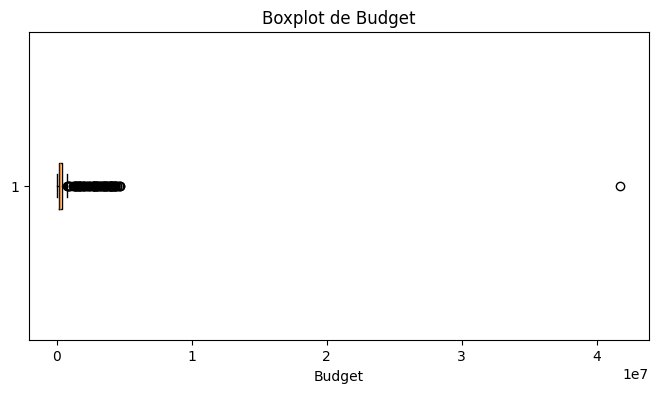

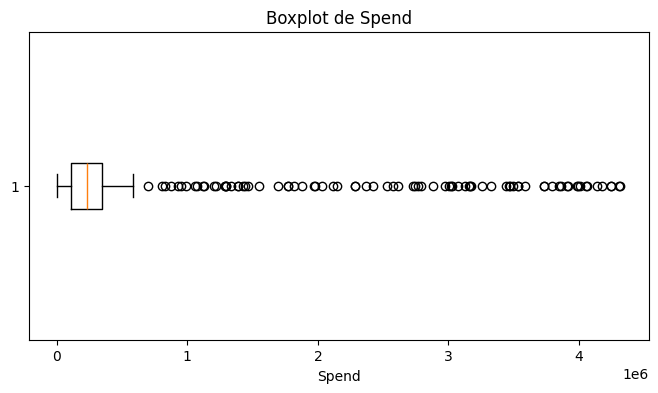

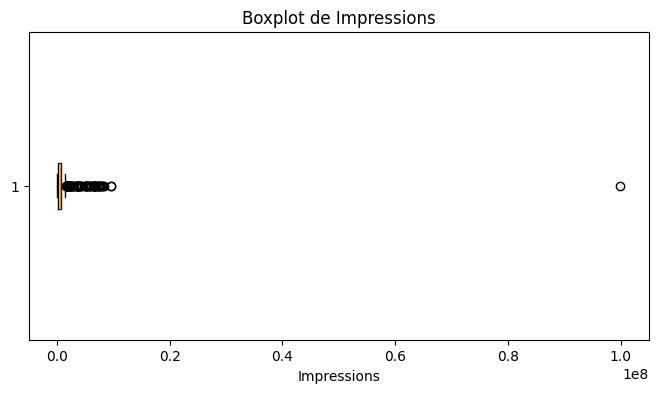

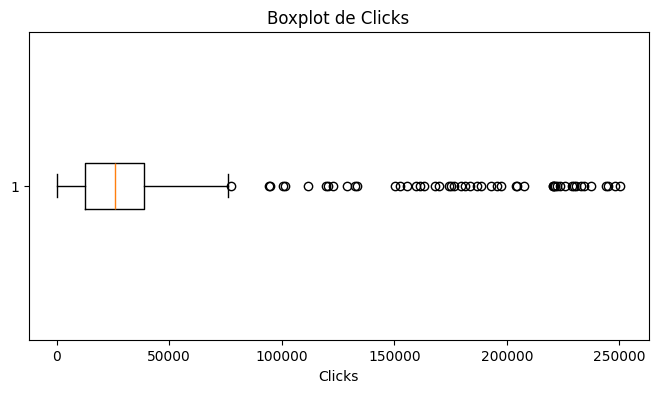

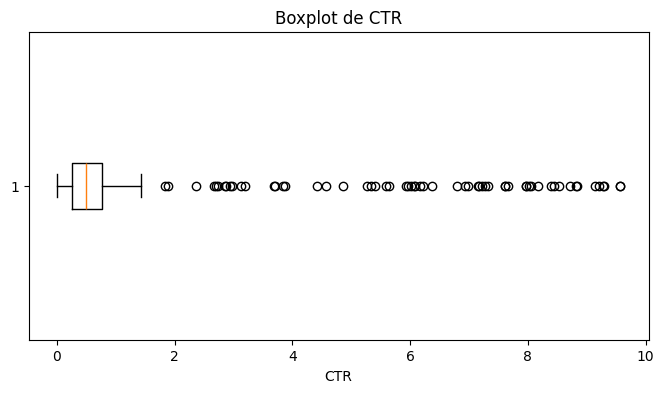

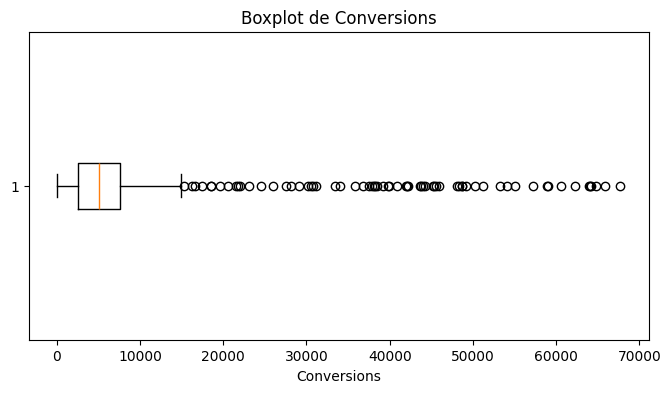

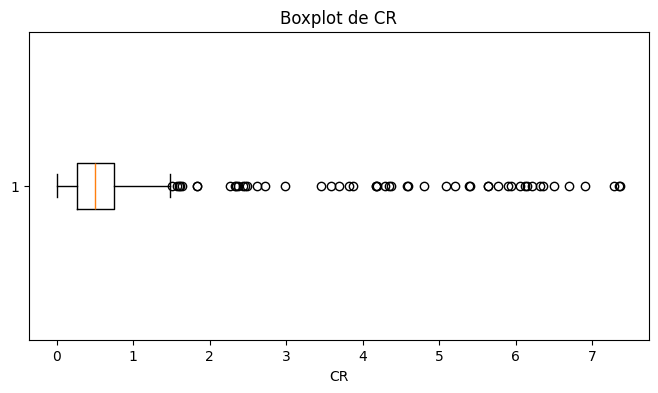

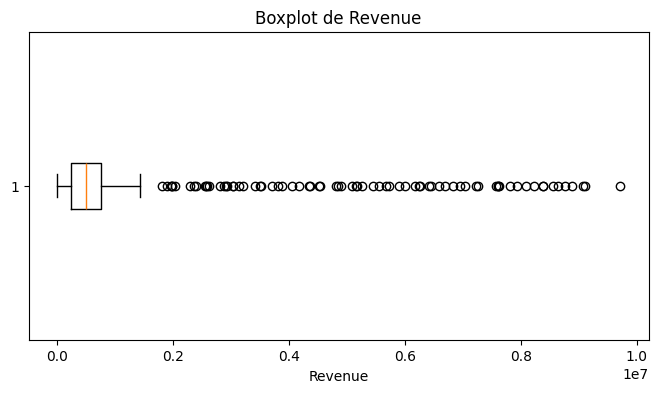

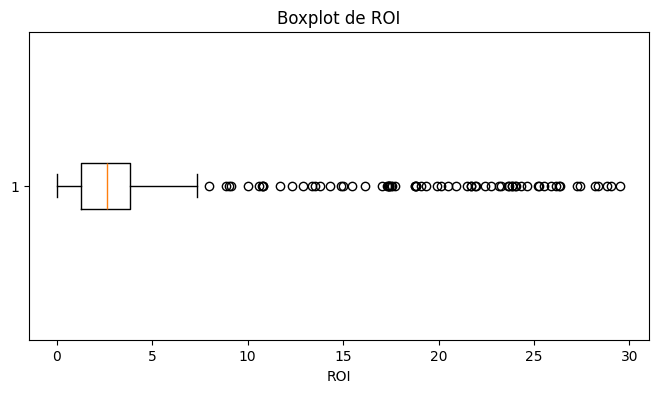

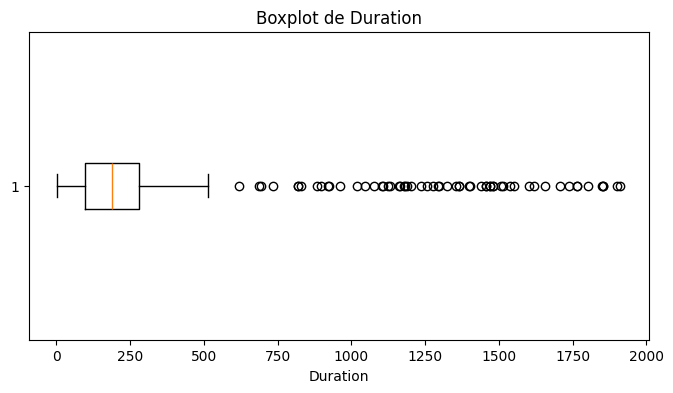

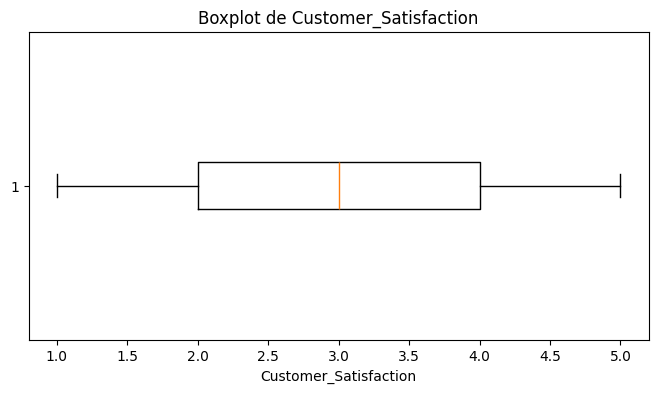

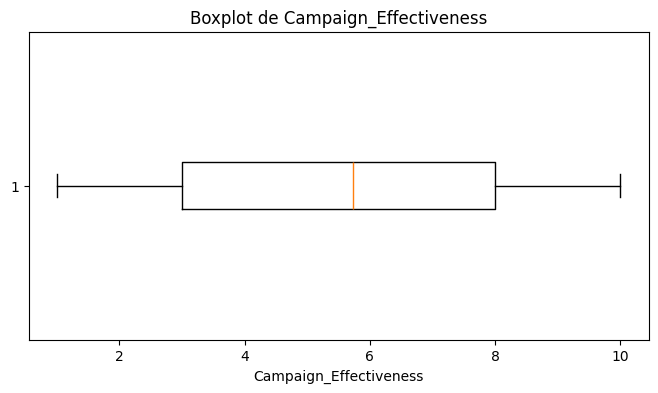

In [36]:
# Filtrar solo las columnas numéricas
numerical_columns = df3.select_dtypes(include='number').columns

# Crear un boxplot para cada columna numérica
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df3[column].dropna(), vert=False)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

In [37]:
# Calcular y contar los outliers para cada columna numérica
outliers_count = {}
for column in numerical_columns:
    # Calcular Q1 y Q3
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites de los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los valores fuera de estos límites
    outliers = df3[(df3[column] < lower_bound) | (df3[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Mostrar la cantidad de outliers por columna
print("Cantidad de outliers en cada columna numérica:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

Cantidad de outliers en cada columna numérica:
Budget: 82
Spend: 82
Impressions: 76
Clicks: 51
CTR: 60
Conversions: 66
CR: 52
Revenue: 75
ROI: 70
Duration: 60
Customer_Satisfaction: 0
Campaign_Effectiveness: 0


In [38]:
# Contar cuántos valores están repartidos en cada segmento de Market_Segment respecto a Spend
market_segment_spend = df3.groupby('Market_Segment')['Spend'].count()

# Mostrar el resultado
print("Distribución de Spend en cada Market_Segment:")
print(market_segment_spend)

Distribución de Spend en cada Market_Segment:
Market_Segment
High      1247
Low       1191
Medium    1217
Name: Spend, dtype: int64


<Axes: xlabel='Budget', ylabel='Count'>

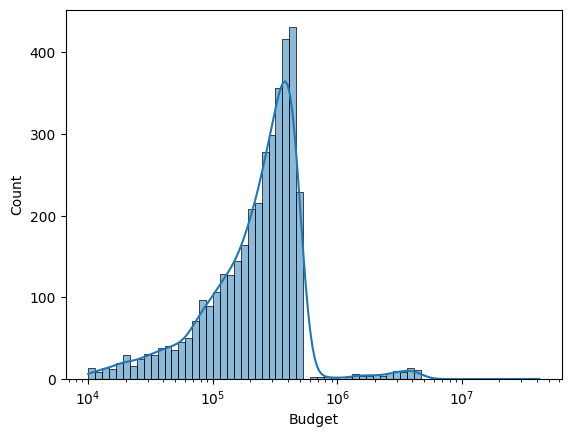

In [39]:
sns.histplot(df3['Budget'], kde=True, log_scale=True)